# Large-Cap Blend Fund Category Analysis: IVV vs VOO vs SPY vs VTI

This analysis compares the top 4 Large-Cap Blend (Blend between Large Growth & Large Value funds) ETFs by fund size (in billions - USD). Those index funds are:<br />

IVV - iShares Core S&P 500 ETF - 0.03% annual expense ratio<br />
VOO - Vanguard Standard and Poor 500 ETF - 0.03% annual expense ratio<br />
SPY - SPDR Standard and Poor 500 ETF Trust - 0.09% annual expense ratio<br />
VTI - Vanguard Total Stock Market ETF - 0.03% annual expense ratio<br />

<br />
The statistical models check the following:<br />
1. Average volume of shares or index funds' units traded with respect to time<br />
2. Highest/Lowest/Open index fund prices traded with respect to time<br />
3. Market Capitalization<br />
4. Trends using moving averages - Do share's tend to increase in the long term?<br />
5. Stock Returns & Volatility - for Annualized & Daily Returns<br />
6. Correlation<br />

<br />
Morningstar fund definitions:<br /> 
1. Large Growth Funds are defined as those that invest in large-sized companies projected to grow fast. These tend to have high volatility, and high valuations (high price ratios & low dividend yields). These are known for being ‘high risk but high reward’.<br />
2. Large Value Funds are defined as those that invest in large-sized companies that have slow growth and low valuations (low price ratios and high dividend yields).<br />
3. Large Blend Funds are defined as those that invest in a combination of large Value & large Growth. These funds represent the overall U.S. Stock market and invest in across the spectrum of U.S. industries.<br />

# Step 1 - Import Libraries & Download Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Dates range from 01/10/2011 to 12/29/2023 for IVV, VTI, VOO & SPY

In [2]:
# Define start & end dates, then import data from Yahoo Finance
# Top 4 Large Blend Fund ETFs are IVV, VOO, SPY & VTI
# As in today (December 11, 2023) these ETFs continue to grow

start = "2011-01-10"
end = "2023-12-29"

# Get data
ivv = yf.download("IVV", start, end)
voo = yf.download("VOO", start, end)
spy = yf.download("SPY", start, end)
vti = yf.download("VTI", start, end)

# Correlation data compilation for 'Step 12'
tickers = ['IVV', 'VOO', 'SPY', 'VTI']
data = yf.download(tickers, start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [ ]:
# Display ivv to verify no errors in download
ivv

In [ ]:
# Display voo to verify no errors in download
voo

In [ ]:
# Display spy to verify no errors in download
spy

In [ ]:
# Display vti to verify no errors in download
vti

## Step 2 - Summarize the Data Frames - Get Statistics

In [3]:
# Define a function to obtain necessary info. for each ETF
def get_info(dataframe):
    etf_info =pd.DataFrame({
                    'Datatype': dataframe.dtypes,                                      # Columns' data type
                    'Total_Element': dataframe.count(),                                # Total elements in column
                    'Null_Count': dataframe.isnull().sum(),                            # Total null values
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100   # Null values %
    })
    return etf_info  

In [4]:
# Call the function
get_info(ivv)
get_info(voo)
get_info(spy)
get_info(vti)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,3264,0,0.0
High,float64,3264,0,0.0
Low,float64,3264,0,0.0
Close,float64,3264,0,0.0
Adj Close,float64,3264,0,0.0
Volume,int64,3264,0,0.0


In [5]:
# IVV's basic stats
ivv.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3.264000e+03
mean,265.463830,266.866146,263.927874,265.509415,242.897037,4.387829e+06
std,103.412759,104.058206,102.735235,103.430811,110.254883,2.471687e+06
min,108.699997,112.970001,107.800003,110.260002,87.695930,9.955000e+05
25%,187.722500,188.807499,186.542507,187.604996,157.480442,2.883400e+06
50%,244.830002,246.050003,243.840004,245.139999,217.796402,3.788100e+06
75%,342.627495,343.980003,339.190002,341.277496,324.247353,5.098900e+06
max,481.369995,482.070007,478.519989,479.839996,479.000000,3.874850e+07


In [6]:
# VOO's basic stats
voo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3.264000e+03
mean,242.517037,243.785971,241.122203,242.550714,221.968411,2.631732e+06
std,94.910791,95.509637,94.278915,94.933305,100.959807,2.356265e+06
min,99.139999,102.820000,98.239998,100.339996,79.948196,4.035000e+04
25%,171.062504,171.932499,169.937504,171.110001,143.791172,1.041250e+06
50%,223.230003,224.305000,222.459999,223.470001,199.057053,2.159300e+06
75%,313.555000,314.802490,310.570000,312.299995,296.512680,3.517000e+06
max,440.579987,441.260010,437.660004,439.250000,437.970001,2.466930e+07


In [7]:
# SPY's basic stats
spy.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3.264000e+03
mean,264.066694,265.517797,262.504795,264.115313,242.089560,1.084041e+08
std,102.998407,103.650262,102.303317,103.018990,109.857979,6.264270e+07
min,108.349998,112.580002,107.430000,109.930000,87.428497,2.027000e+07
25%,186.700005,187.662502,185.420002,186.580002,156.690933,6.783628e+07
50%,243.000000,244.195000,242.074997,243.139999,217.501701,9.152375e+07
75%,341.217499,342.725014,338.014992,339.885010,323.354660,1.300046e+08
max,479.220001,479.980011,476.260010,477.709991,476.690002,7.178287e+08


In [8]:
# VTI's basic stats
vti.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3.264000e+03
mean,134.962969,135.666998,134.130689,134.961075,123.689792,3.024686e+06
std,51.725608,52.042119,51.354901,51.721080,55.034169,1.905487e+06
min,55.080002,57.349998,54.580002,55.810001,44.623474,5.524000e+05
25%,96.587498,97.185001,96.025000,96.602501,81.555864,1.863875e+06
50%,124.769997,125.340000,124.330002,124.744999,111.774593,2.610800e+06
75%,173.564995,174.402504,172.080006,173.452499,164.701904,3.587175e+06
max,243.729996,244.059998,242.429993,242.970001,238.250000,2.227240e+07


# Step 3 - Comparison of Funds (Average Volume of Units Traded)

In [9]:
# Find the average of the volume of ETFs traded over time for each stock.
# Round off the value.
ivv_vol_avg = round(ivv["Volume"].mean())
voo_vol_avg = round(voo["Volume"].mean())
spy_vol_avg = round(spy["Volume"].mean())
vti_vol_avg = round(vti["Volume"].mean())

# Convert results in array
vol_avg = np.array([ivv_vol_avg, voo_vol_avg, spy_vol_avg, vti_vol_avg])

In [10]:
# Print
ivv_note = "Average volume for IVV is: " + str(vol_avg[0])
voo_note = "Average volume for VOO is: " + str(vol_avg[1])
spy_note = "Average volume for SPY is: " + str(vol_avg[2])
vti_note = "Average volume for VTI is: " + str(vol_avg[3])

In [11]:
ivv_note

'Average volume for IVV is: 4387829'

In [12]:
voo_note

'Average volume for VOO is: 2631732'

In [13]:
spy_note

'Average volume for SPY is: 108404075'

In [14]:
vti_note

'Average volume for VTI is: 3024686'

### Note that SPY (108M) has the highest trading volume, followed by IVV (4.4M), VTI (3.0M) and then VOO (2.6M)

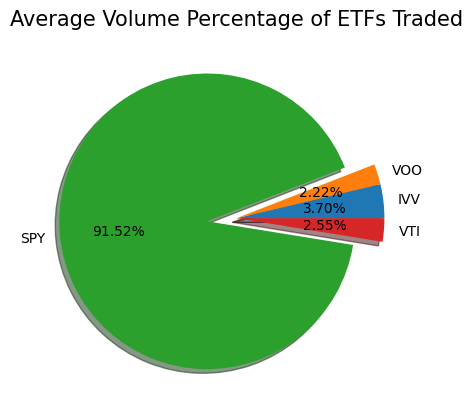

In [15]:
# Create a pie chart
# Set labels
mylabels = ["IVV", "VOO", "SPY", "VTI"]
myexplode = [0, 0, 0.2, 0] # To create exploding wedge

# Set data points & graph
plt.pie(vol_avg, labels=mylabels, explode=myexplode, shadow=True, autopct='%1.2f%%')
plt.title('Average Volume Percentage of ETFs Traded', fontsize=15);

# Step 4 - Visualize the Trade Volume over Time

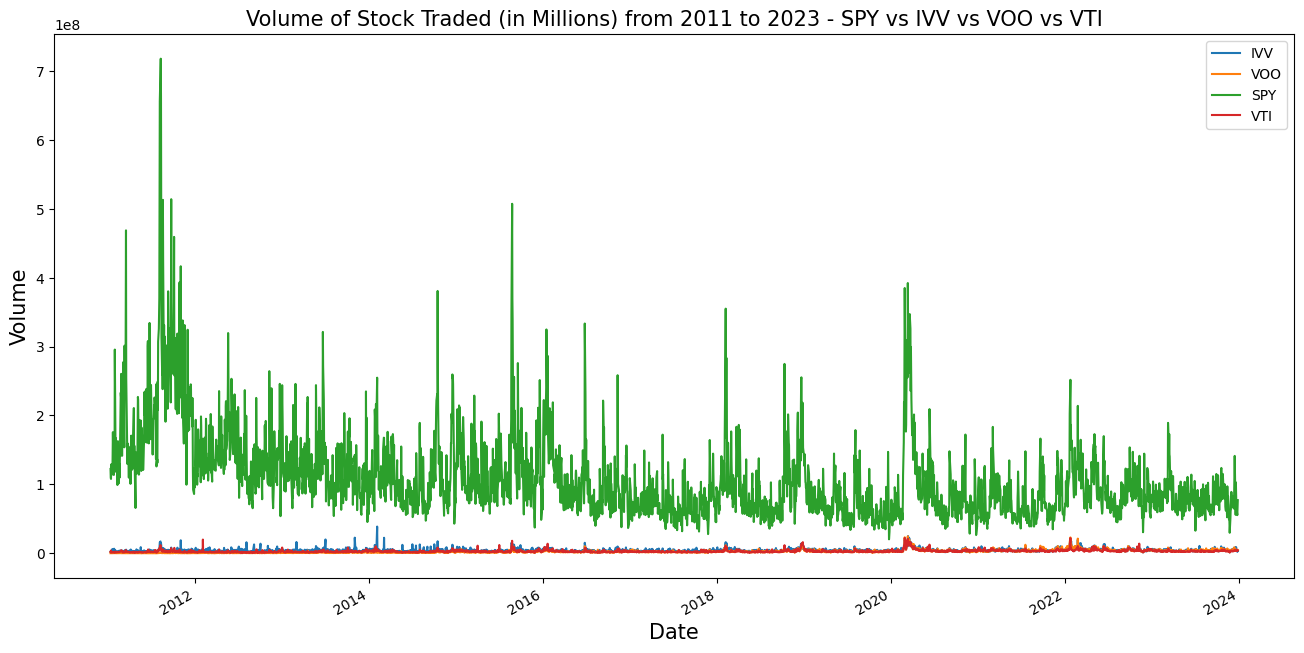

In [16]:
# Perform the visualization in a single graph
# Set data points
ivv['Volume'].plot(label='IVV', figsize=(16,8))
voo['Volume'].plot(label='VOO')
spy['Volume'].plot(label='SPY')
vti['Volume'].plot(label='VTI')

# Set graph
plt.title('Volume of Stock Traded (in Millions) from 2011 to 2023 - SPY vs IVV vs VOO vs VTI', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.legend();

### The graph (SPY vs IVV vs VOO vs VTI) shows that SPY clearly surpasses VOO, IVV & VTI when it comes to trading volume.

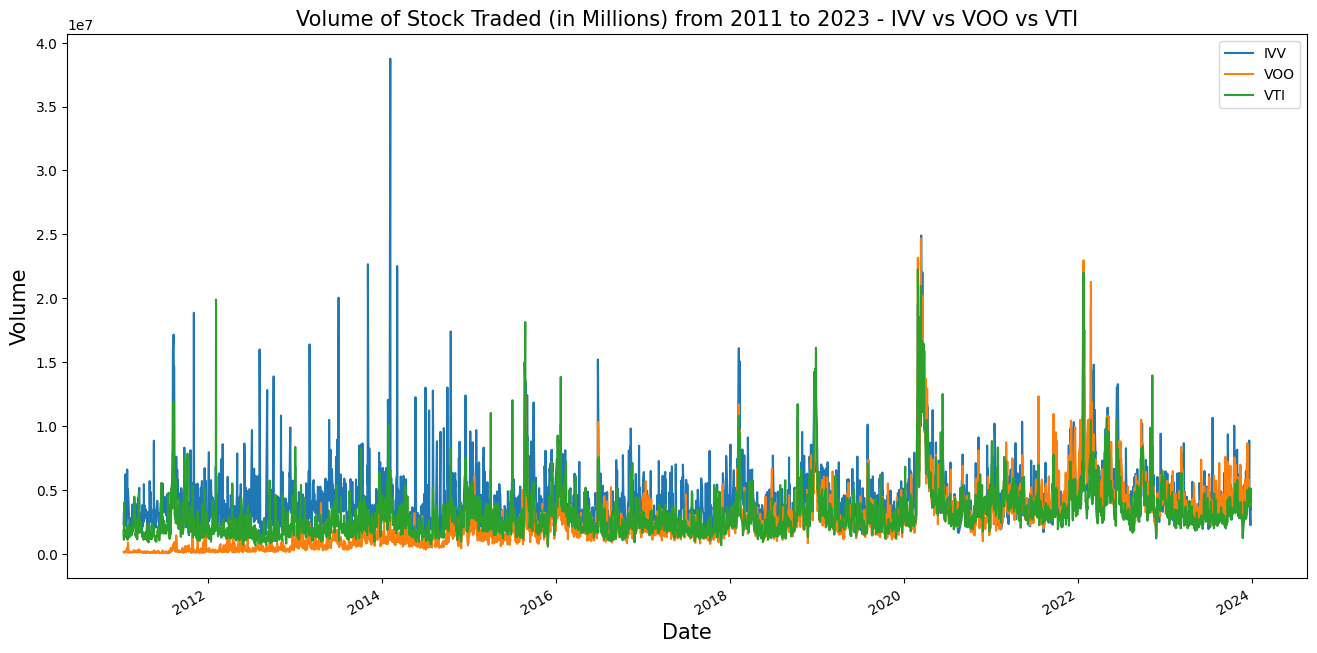

In [17]:
# Perform the visualization in a single graph
# Set data points
ivv['Volume'].plot(label='IVV', figsize=(16,8))
voo['Volume'].plot(label='VOO')
vti['Volume'].plot(label='VTI')

# Set graph
plt.title('Volume of Stock Traded (in Millions) from 2011 to 2023 - IVV vs VOO vs VTI', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.legend();

### The graph (IVV vs VOO vs VTI) shows that IVV had a higher to trading volume from 2011 to 2020, followed by VTI & then VOO. After 2020, it seems that all 3 graphs seem to 'converge', meaning that trading volume for IVV, VOO & VTI are pretty similar on recent years. Note that the huge 'spike' during March 2020 was caused by the global COVID pandemic.

# Step 5 - Find the Highest Price (in USD) of ETFs Traded with Time

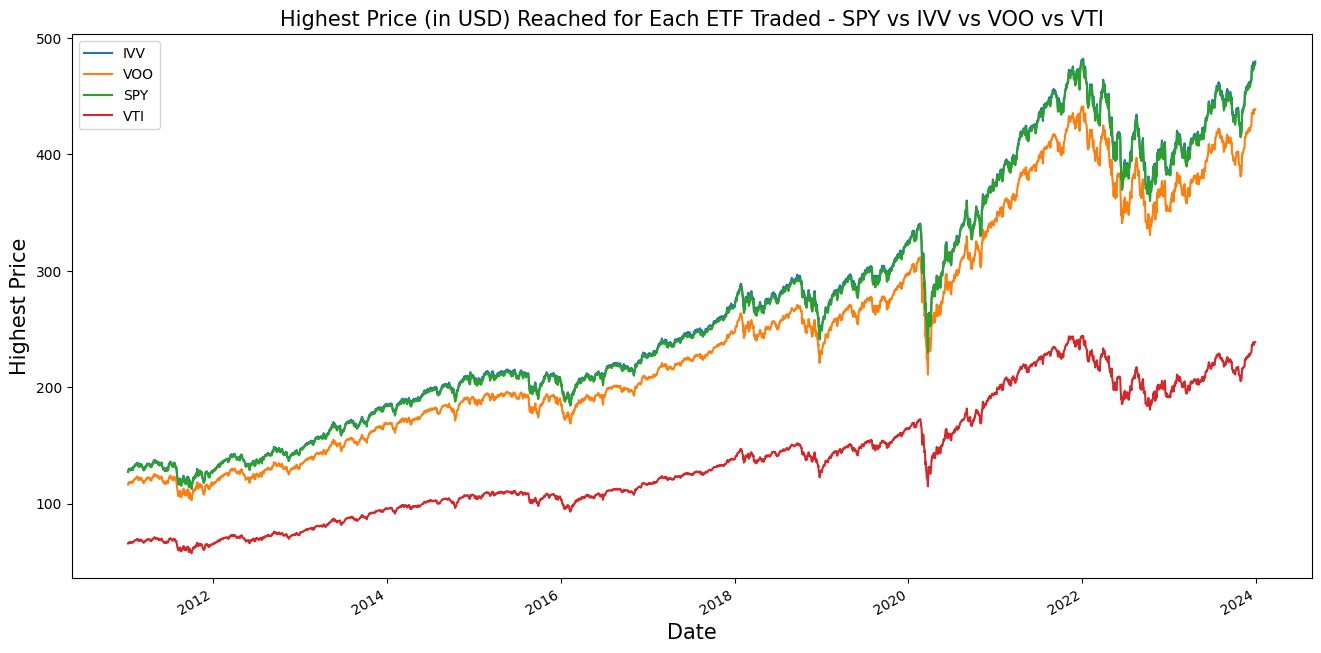

In [18]:
# Perform the visualization in a single graph
# Set Data points
ivv['High'].plot(label = 'IVV', figsize = (16,8)) 
voo['High'].plot(label = 'VOO') 
spy['High'].plot(label = 'SPY')
vti['High'].plot(label = 'VTI')

# Set Graph
plt.title('Highest Price (in USD) Reached for Each ETF Traded - SPY vs IVV vs VOO vs VTI', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Highest Price', fontsize=15)
plt.legend();

# Step 6 - Find the Lowest Prices (in USD) of ETFs Traded with Time

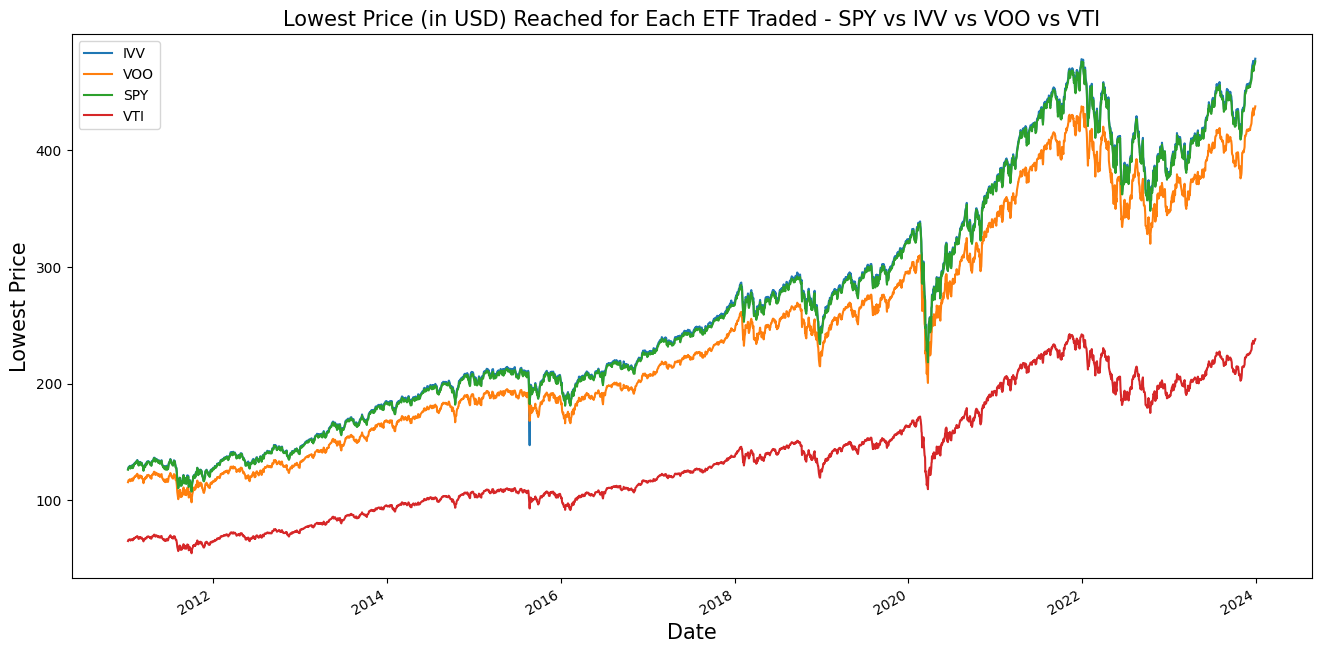

In [19]:
# Perform the visualization in a single graph
# Set Data points
ivv['Low'].plot(label = 'IVV', figsize = (16,8)) 
voo['Low'].plot(label = 'VOO') 
spy['Low'].plot(label = 'SPY')
vti['Low'].plot(label = 'VTI')

# Set Graph
plt.title('Lowest Price (in USD) Reached for Each ETF Traded - SPY vs IVV vs VOO vs VTI', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Lowest Price', fontsize=15)
plt.legend();

# Step 7 - Find the Open Price (in USD) of ETFs Traded with Time

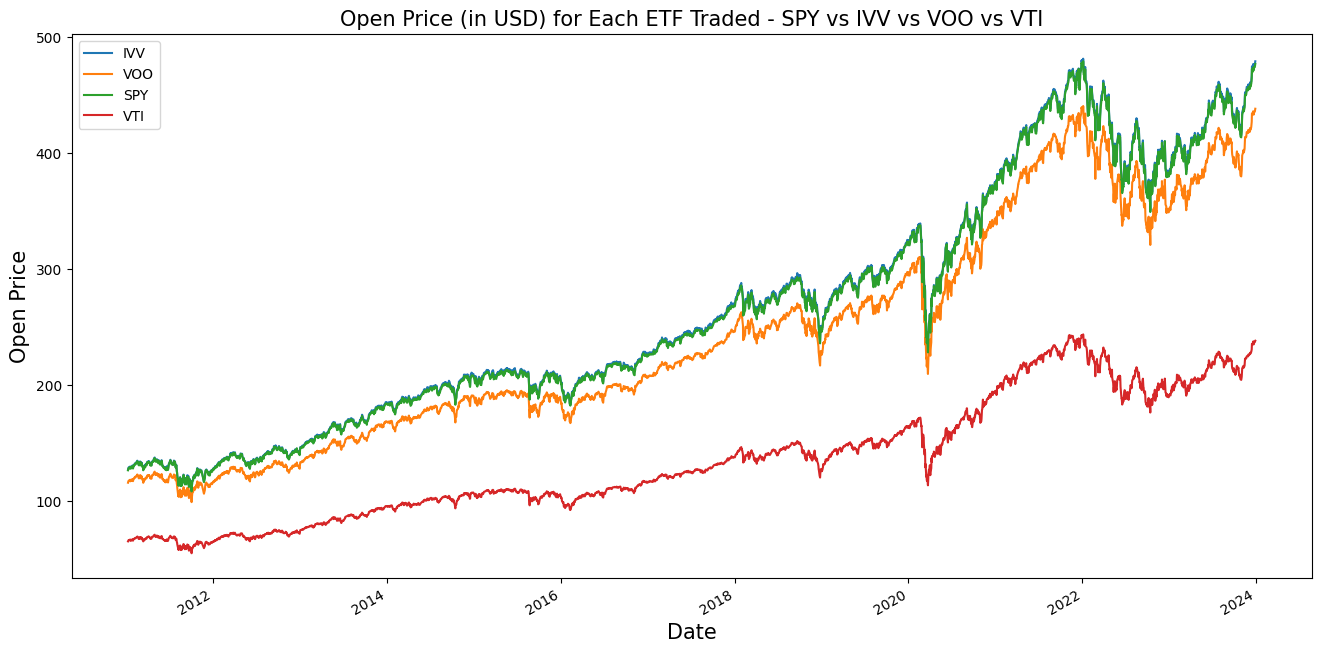

In [20]:
# Perform the visualization in a single graph
# Set Data points
ivv['Open'].plot(label = 'IVV', figsize = (16,8)) 
voo['Open'].plot(label = 'VOO') 
spy['Open'].plot(label = 'SPY')
vti['Open'].plot(label = 'VTI')

# Set Graph
plt.title('Open Price (in USD) for Each ETF Traded - SPY vs IVV vs VOO vs VTI', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Open Price', fontsize=15)
plt.legend();

# Step 8 - Market Capitalization

This gives the value of an ETF that is traded in the stock market. This allows investors to understand how valuable the index fund is perceived.
The size and value of an ETF gives the level of risk one might expect when investing in it, as well as how much an investment might return over time.
It is found by calculating the product of the total number of shares with the present price of shares.

M_Cap = Total Number of Shares * Present Shares Price


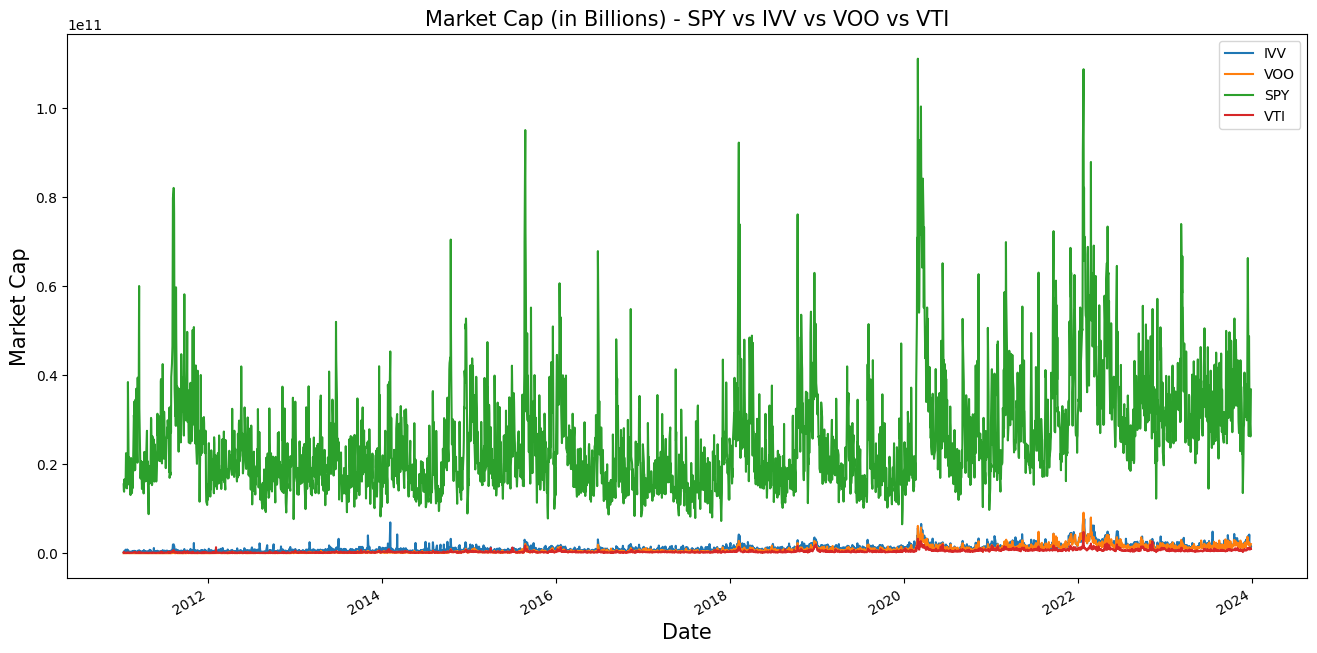

In [21]:
# Perform the visualization in a single graph
ivv['M_Cap'] = ivv['Open'] * ivv['Volume']
voo['M_Cap'] = voo['Open'] * voo['Volume']
spy['M_Cap'] = spy['Open'] * spy['Volume']
vti['M_Cap'] = vti['Open'] * vti['Volume']

# Set Data points
ivv['M_Cap'].plot(label = 'IVV', figsize = (16,8)) 
voo['M_Cap'].plot(label = 'VOO') 
spy['M_Cap'].plot(label = 'SPY')
vti['M_Cap'].plot(label = 'VTI')

# Set Graph
plt.title('Market Cap (in Billions) - SPY vs IVV vs VOO vs VTI', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)
plt.legend();

### For the given data, we can see that SPY provides the greatest Market Cap over time (12 years worth of data), this is expected as SPY has a higher trading volume.

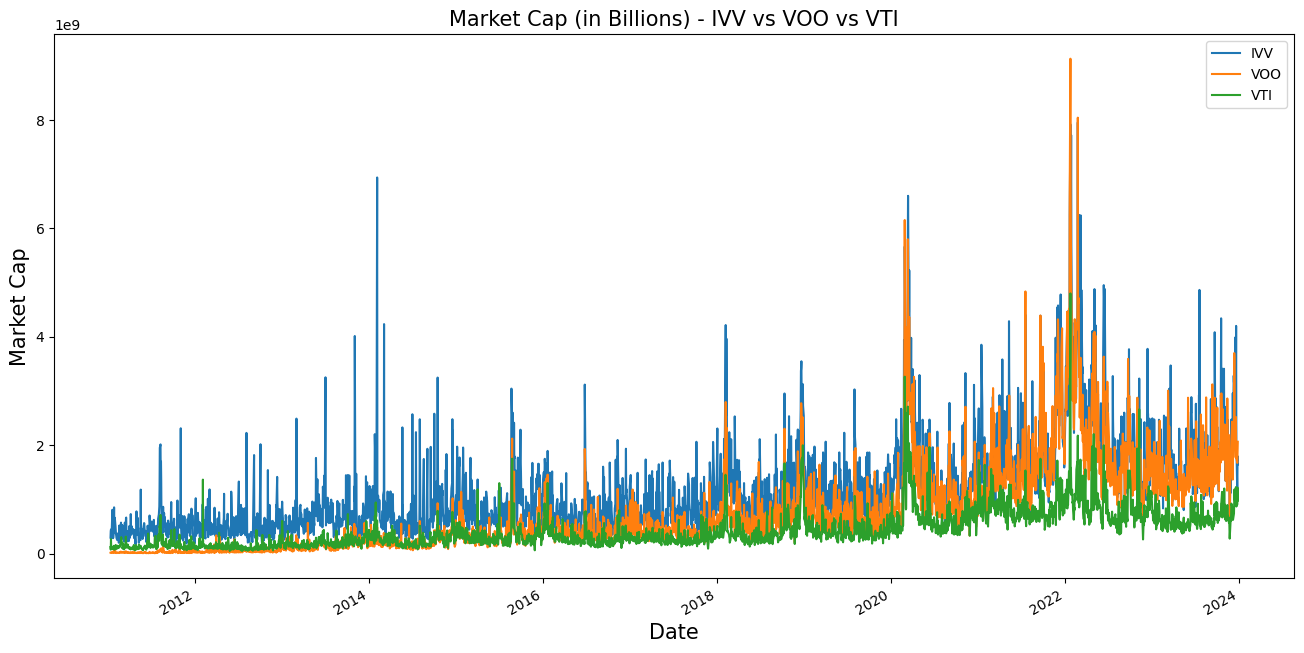

In [22]:
# Perform the visualization in a single graph
#ivv['M_Cap'] = ivv['Open'] * ivv['Volume']
#voo['M_Cap'] = voo['Open'] * voo['Volume']
#vti['M_Cap'] = vti['Open'] * vti['Volume']

# Set data points
ivv['M_Cap'].plot(label = 'IVV', figsize = (16,8)) 
voo['M_Cap'].plot(label = 'VOO') 
vti['M_Cap'].plot(label = 'VTI')

# Set graph
plt.title('Market Cap (in Billions) - IVV vs VOO vs VTI', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)
plt.legend();

### For the given data (SPY excluded), we can see that IVV & VOO have a greater Market Cap compared to VTI (as their graphs are very similar). In this case, VTI has the highest level of risk, which is expected as VTI is exposed to the ENTIRE market and not only the top largest 500 companies in the US (recall that IVV & VOO are S&P 500 index funds / ETFs). Overrall, historical data shows that IVV & VOO will probably continue to provide better returns. Note that the graph is not a prediction model.

# Step 9 - Moving Averages: Determine if the Funds have Significant Upward Trends

Moving Averages are used to deal with price fluctuations, since ETF prices change rapidly over time. In general, an upward trend in a moving average (bull market) might imply an increase in the price or momentum of a security, while a downward trend (bear market) would be seen as a decline.

We can use the help of 50-day and 200-day averages to look for trends. The 200-day moving average is considered especially significant in stock/ETF trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend.

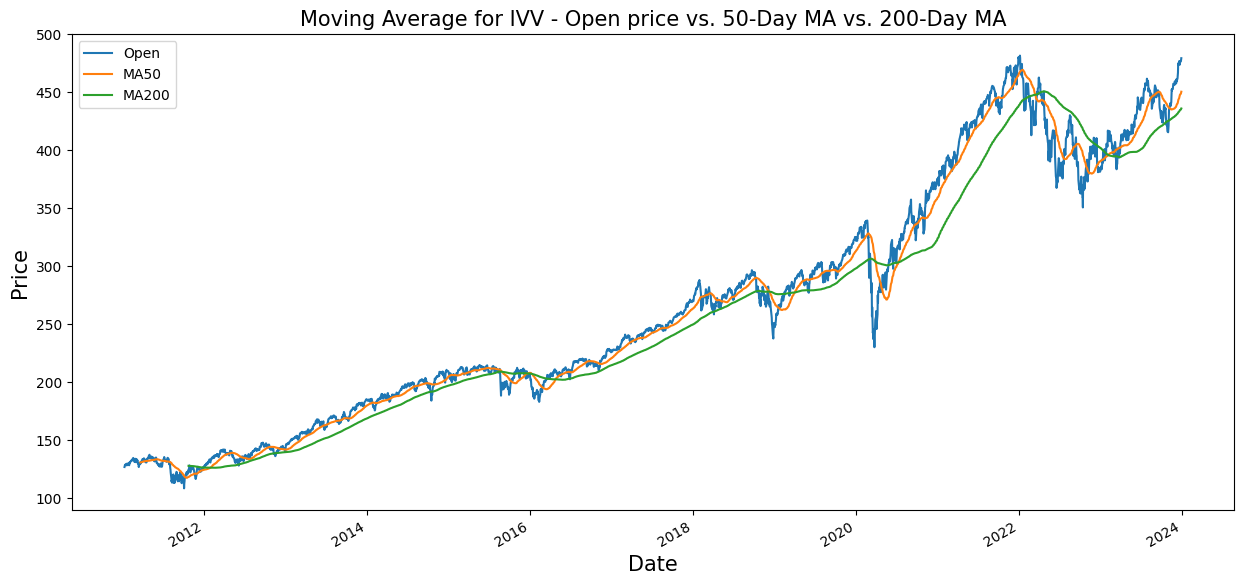

In [23]:
# Perform the visualization on moving average
ivv['MA50'] = ivv['Open'].rolling(50).mean() 
ivv['MA200'] = ivv['Open'].rolling(200).mean()

# Set data points
ivv['Open'].plot(figsize = (15,7))
ivv['MA50'].plot()
ivv['MA200'].plot()

# Set graph
plt.title('Moving Average for IVV - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

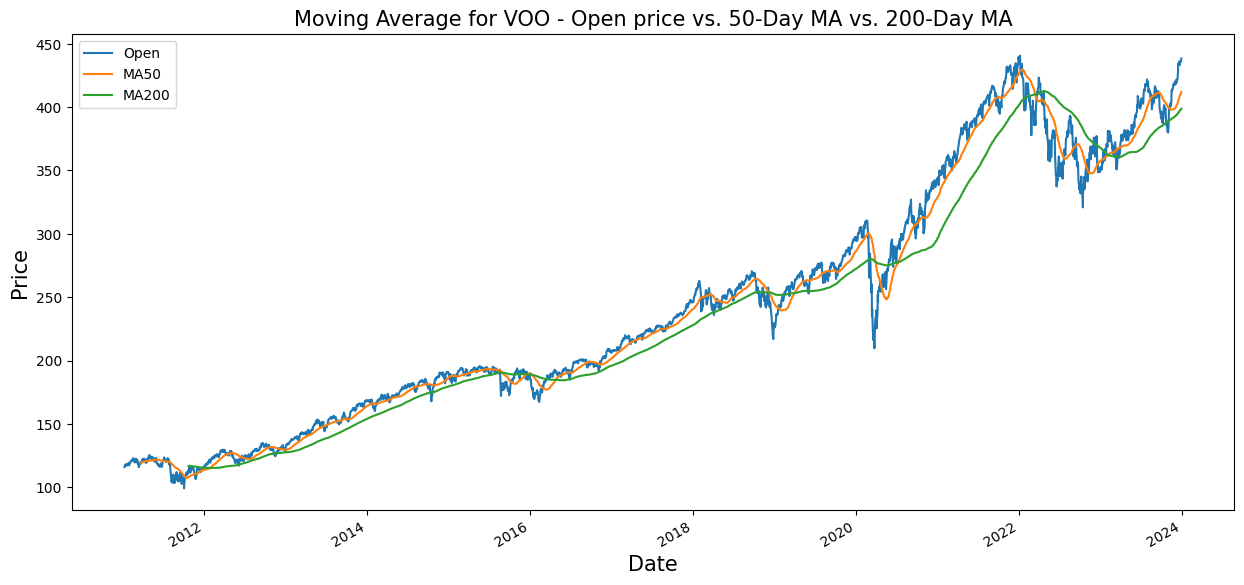

In [24]:
# Perform the visualization in moving average
voo['MA50'] = voo['Open'].rolling(50).mean() 
voo['MA200'] = voo['Open'].rolling(200).mean()

# Set data points
voo['Open'].plot(figsize = (15,7))
voo['MA50'].plot()
voo['MA200'].plot()

# Set graph
plt.title('Moving Average for VOO - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

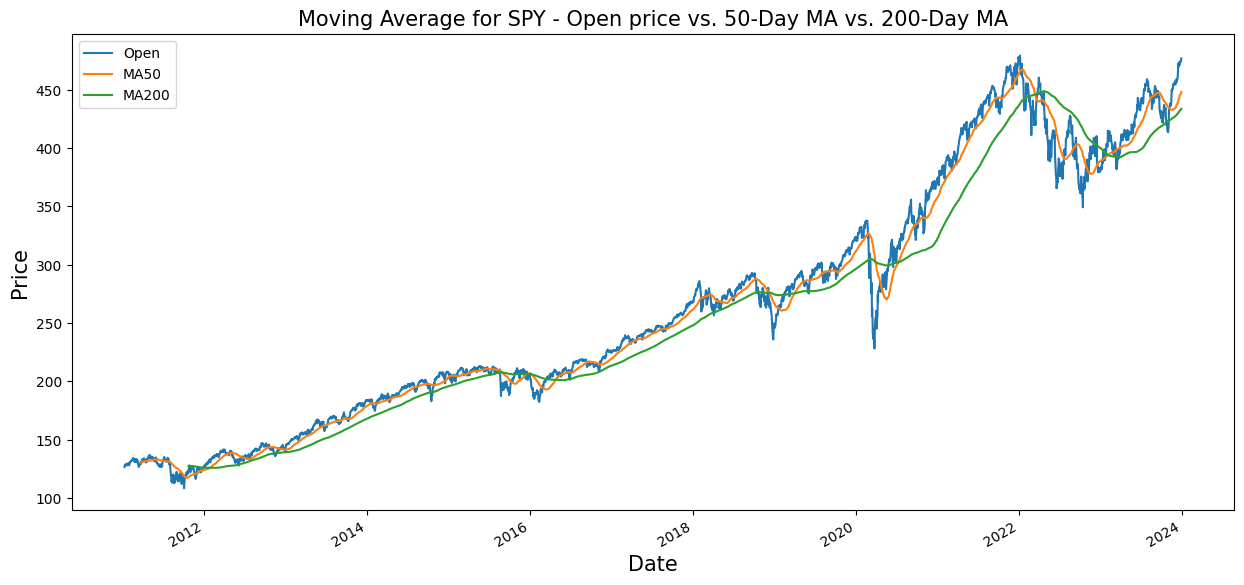

In [25]:
# Perform the visualization in moving average
spy['MA50'] = spy['Open'].rolling(50).mean() 
spy['MA200'] = spy['Open'].rolling(200).mean()

# Set data points
spy['Open'].plot(figsize = (15,7))
spy['MA50'].plot()
spy['MA200'].plot()

# Set graph
plt.title('Moving Average for SPY - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

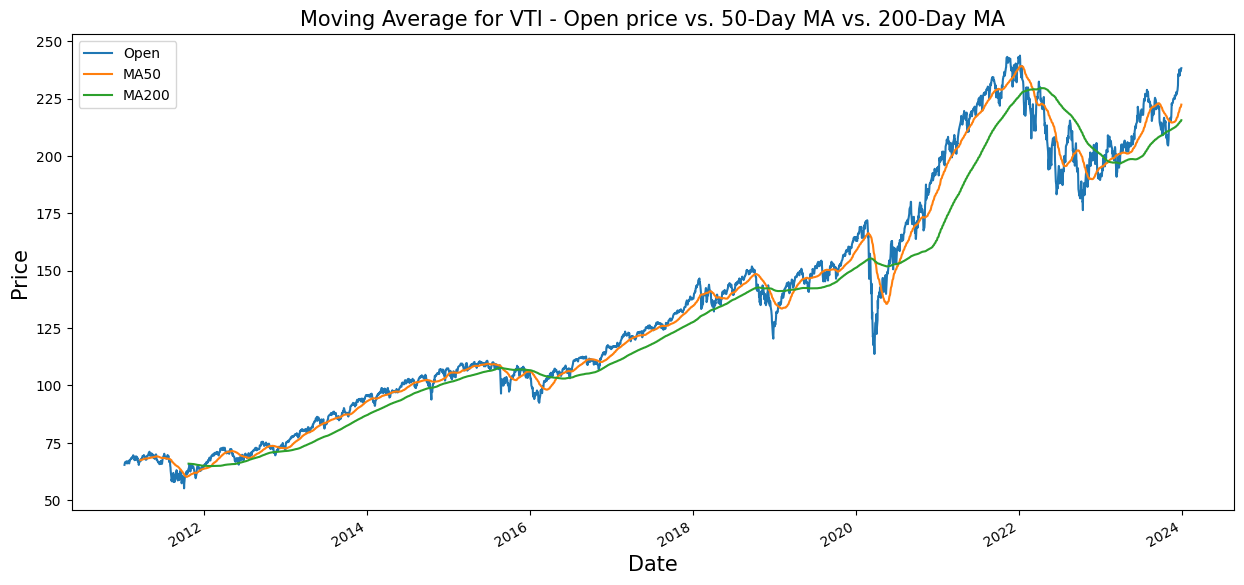

In [26]:
# Perform the visualization in moving average
vti['MA50'] = vti['Open'].rolling(50).mean() 
vti['MA200'] = vti['Open'].rolling(200).mean()

# Set data points
vti['Open'].plot(figsize = (15,7))
vti['MA50'].plot()
vti['MA200'].plot()

# Set graph
plt.title('Moving Average for VTI - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

### Notice that the historical stock market data (12 years of collected data points available in Yahoo Finance) for the 4 ETFs (IVV, VOO, SPY & VTI) trend 'upwards', meaning that their prices tend to increase in monetary value with respect to time. Notice that the orange lines or moving averages tend to increase with respect to time as well. Although there will always be economic downturns (such as 2020 when a global pandemic was declared, and during the 1st 2 years of the Ukraine & Russia war) that will cause stock/ETF prices to decrease, markets eventually recover and prices will not decrease or stagnate in the long run.    

# Step 10 - Volatility & Stock/ETF Returns

A percentage increase in an index fund or ETF value is the change in that same fund comparing that to the previous day. The bigger the value either positive or negative the volatile the stock or fund is. For instance, an AMAZON share that during day 1, 2, & 3 cost 153.00, 152.63 and 154.03 respectively is less volatile than bitcoin that during day 1, 2, & 3 cost 100.00, 180.23 and suddenly plummets to 40.89 respectively.

The formula for interday return is:
rt = (Pt/Pt-1) - 1, where,
</br>
rt = Return, </br>
Pt = Price at time T (close price of current day), </br>
Pt-1 = Price at time T-1 (close price of the previous day).</br>

Most investors fear volatility, hence stability is preferred. It is essential for our analysis to model the potential range of an investment's possible returns with the appearance of a normal distribution, however stock or ETF returns are statistically not normally distributed - meaning that there will always be many outliers. To describe an investment, we only need to get 3 values: the mean (a.k.a. the investment’s expected return), the standard deviation (a.k.a. the investment’s risk or volatility for daily returns) and the annualized volatility.
With the help of histograms, we can find out whether an index fund or ETF is relatively stable.

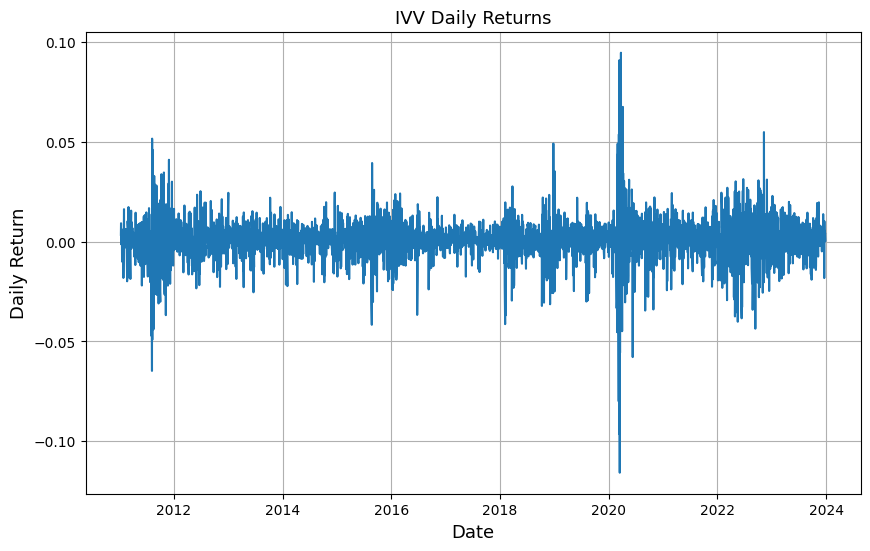

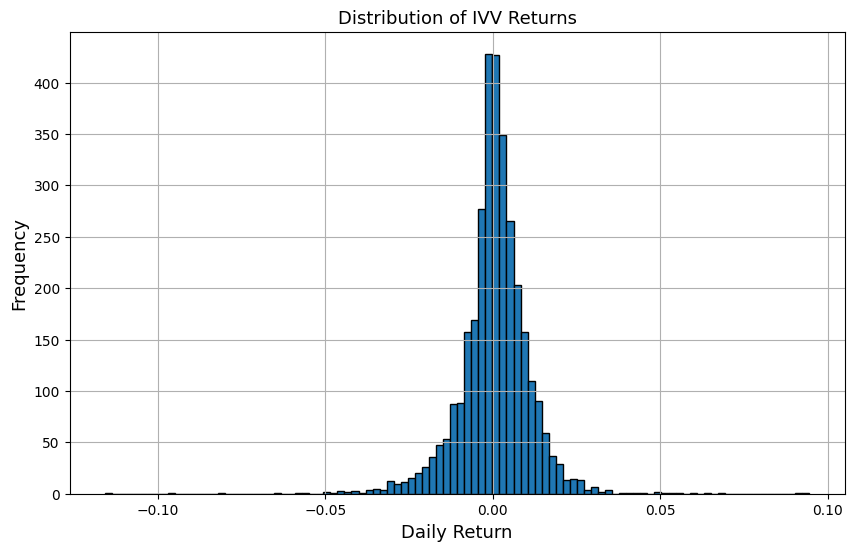

The average expected return percentage for IVV is: 0.00046697268395079136 or 0.000467
The std or risk (or average volatility for daily returns) percentage for IVV is: 0.011044729648239266 or 0.0110447
The average annualized volatility percentage for IVV: 0.17532964768309797 or 0.1753296


In [27]:
# Perform the visualization in a single graph
ivv['Daily Returns'] = ((ivv['Close']) - (ivv['Close'].shift(1)))/(ivv['Close'].shift(1))
ivv['Daily Returns'] = ivv['Daily Returns'].dropna()

# Volatility
volatility = ivv['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(ivv.index, ivv['Daily Returns'])
plt.title('IVV Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(ivv['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of IVV Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = ivv['Daily Returns'].mean()
sd = ivv['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for IVV is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for IVV is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for IVV: ' + str(av) + ' or ' + str(round(av, 7)))

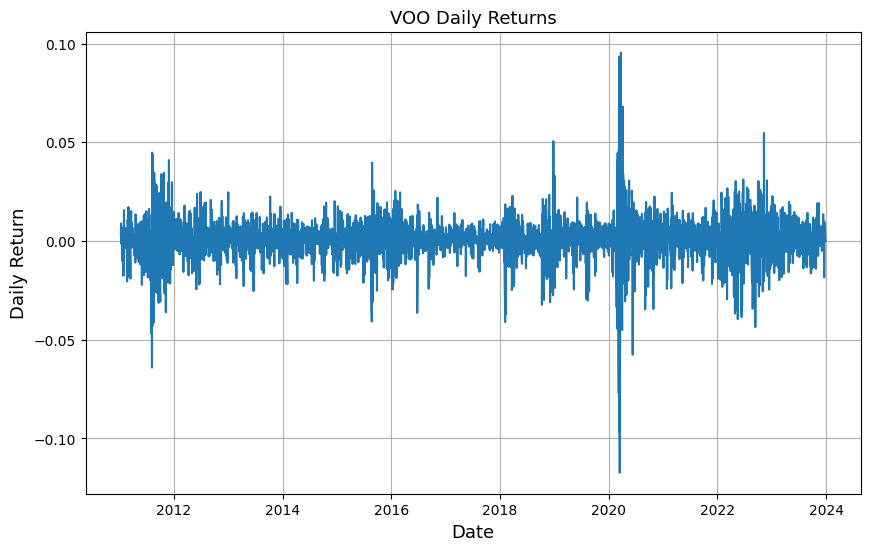

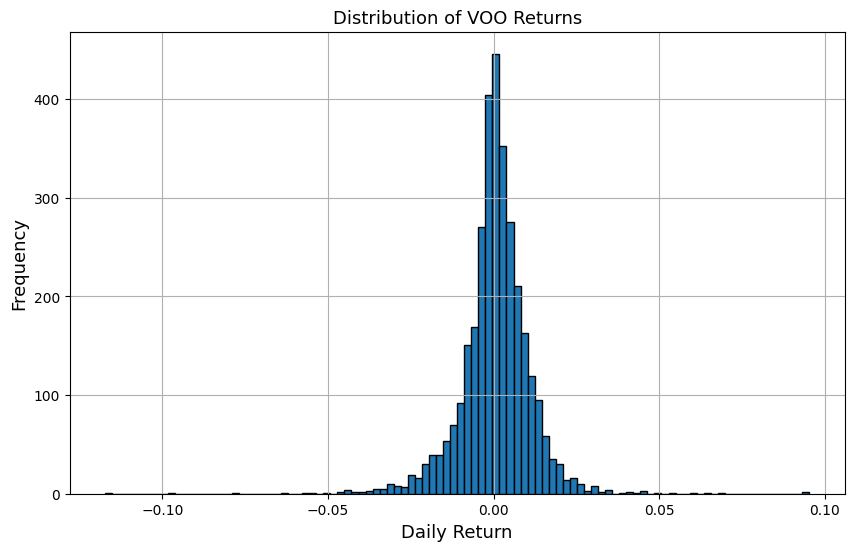

The average expected return percentage for VOO is: 0.0004672936074102651 or 0.0004673
The std or risk (or average volatility for daily returns) percentage for VOO is: 0.010985948375865038 or 0.0109859
The average annualized volatility percentage for VOO: 0.17439652391239702 or 0.1743965


In [28]:
# Perform the visualization in a single graph
voo['Daily Returns'] = ((voo['Close']) - (voo['Close'].shift(1)))/(voo['Close'].shift(1))
voo['Daily Returns'] = voo['Daily Returns'].dropna()

# Volatility
volatility = voo['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(voo.index, voo['Daily Returns'])
plt.title('VOO Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(voo['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of VOO Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = voo['Daily Returns'].mean()
sd = voo['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for VOO is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for VOO is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for VOO: ' + str(av) + ' or ' + str(round(av, 7)))

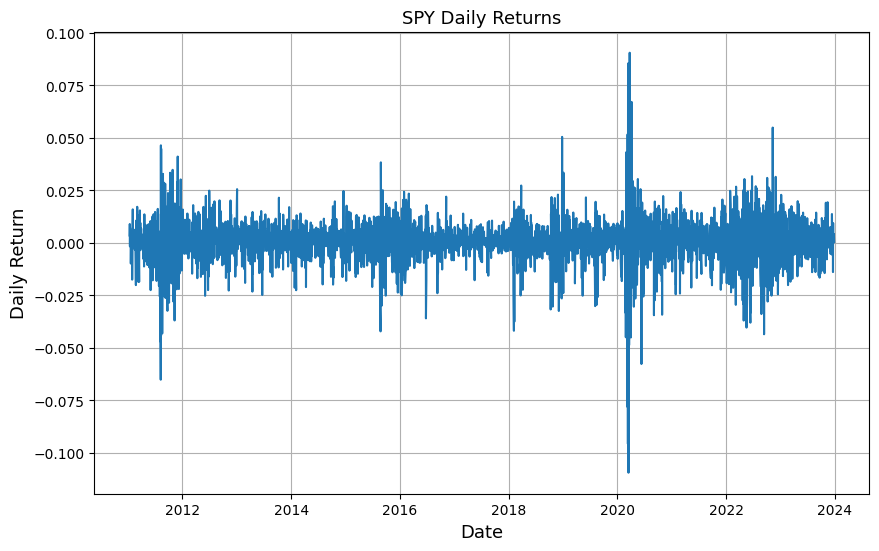

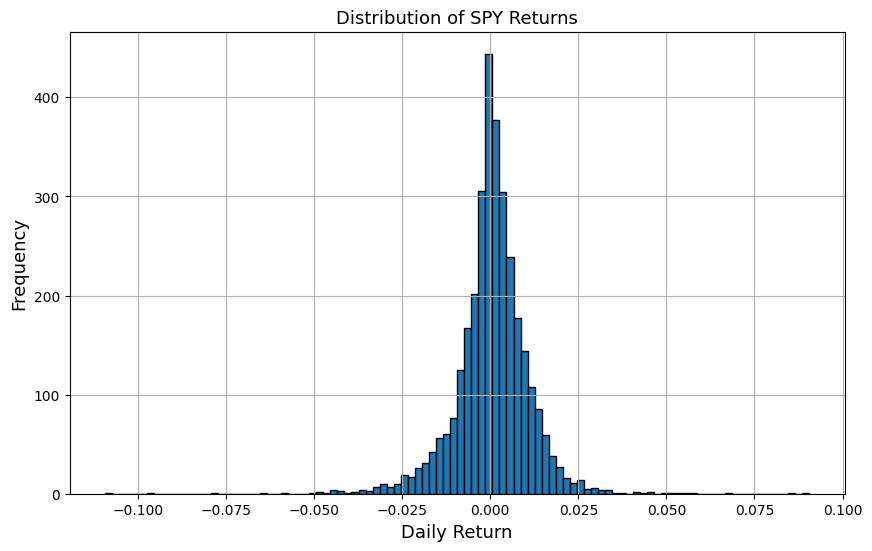

The average expected return percentage for SPY is: 0.00046557325024279664 or 0.0004656
The std or risk (or average volatility for daily returns)  percentage for SPY is: 0.010940625188074139 or 0.0109406
The average annualized volatility percentage for SPY: 0.17367704061128061 or 0.173677


In [29]:
# Perform the visualization in a single graph
spy['Daily Returns'] = ((spy['Close']) - (spy['Close'].shift(1)))/(spy['Close'].shift(1))
spy['Daily Returns'] = spy['Daily Returns'].dropna()

# Volatility
volatility = spy['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(spy.index, spy['Daily Returns'])
plt.title('SPY Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(spy['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of SPY Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = spy['Daily Returns'].mean()
sd = spy['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for SPY is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns)  percentage for SPY is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for SPY: ' + str(av) + ' or ' + str(round(av, 7)))

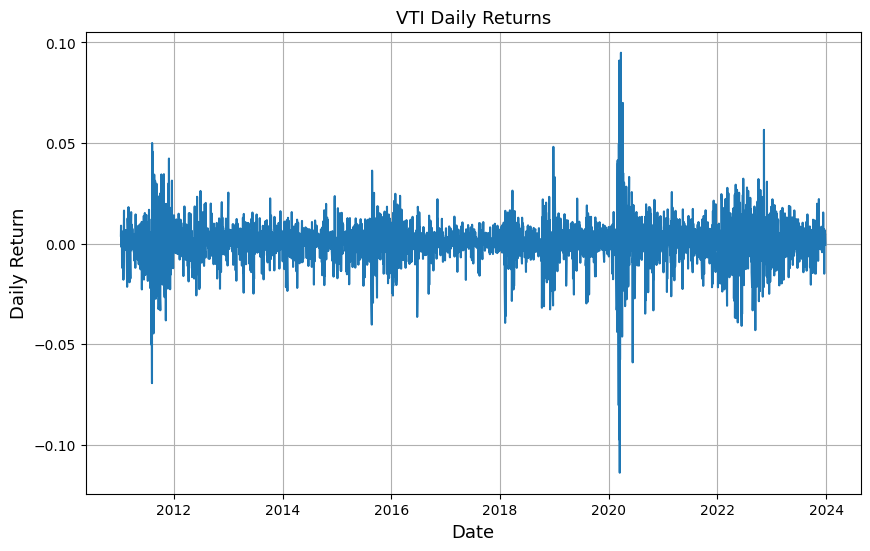

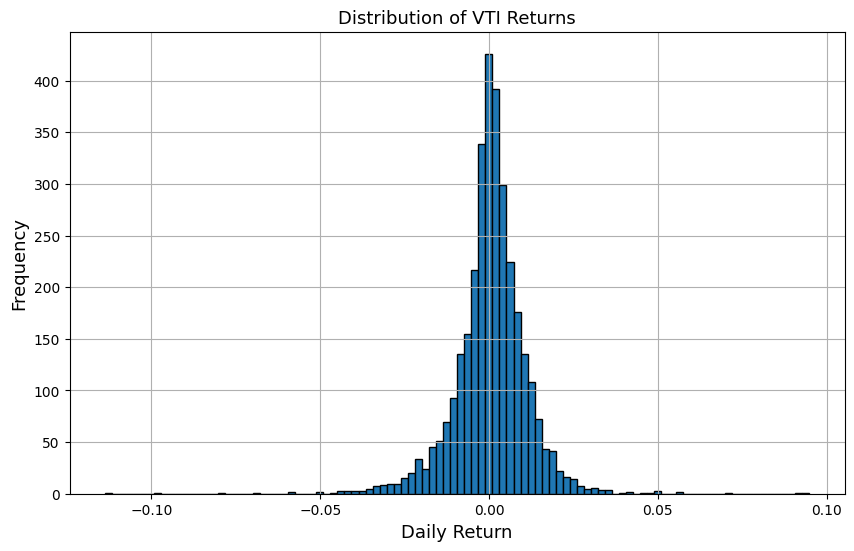

The average expected return percentage for VTI is: 0.0004580738289177448 or 0.0004581
The std or risk (or average volatility for daily returns) percentage for VTI is: 0.011182988918626909 or 0.011183
The average annualized volatility percentage for VTI: 0.1775244455584676 or 0.1775244


In [30]:
# Perform the visualization in a single graph
vti['Daily Returns'] = ((vti['Close']) - (vti['Close'].shift(1)))/(vti['Close'].shift(1))
vti['Daily Returns'] = vti['Daily Returns'].dropna()

# Volatility
volatility = vti['Daily Returns'].std()

# Annualized volatility (252 days of trading are avilable per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(vti.index, vti['Daily Returns'])
plt.title('VTI Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(vti['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of VTI Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = vti['Daily Returns'].mean()
sd = vti['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for VTI is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for VTI is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for VTI: ' + str(av) + ' or ' + str(round(av, 7)))

### Mean or expected return percentage for each fund goes as VOO (0.0004673) > IVV (0.0004670) > SPY (0.0004656) > VTI (0.0004581)
### STD or risk (or average volatility for daily returns) percentage goes as VTI (0.0111830) > IVV (0.0110447) > VOO (0.0109859) > SPY (0.0109406)
### The average annualized volatility percentage goes as VTI (0.1775244) > IVV (0.1753296) > VOO (0.1743965) > SPY (0.173677)
### In conclusion, all Return Histograms appear to have outliers (abnormally large spikes from daily return graphs), which is expected. The index fund with historically the highest return & the lowest risk is VOO, followed by IVV, then SPY, and VTI has the less returns with highest level of risk. For annualized volatility, VTI is also the most volatile. Please note that this doesn't determine exact dividend amounts. Note that VOO, IVV & SPY are index funds that specifically target the S&P 500 therefore the risk is expected to be lower than VTI that has many more holdings (3765 in total - which include companies that don't perform well in comparison to the top 500).

# Step 11 - Correlations: Create Correlation Tables of the Index Fund's own Variables 

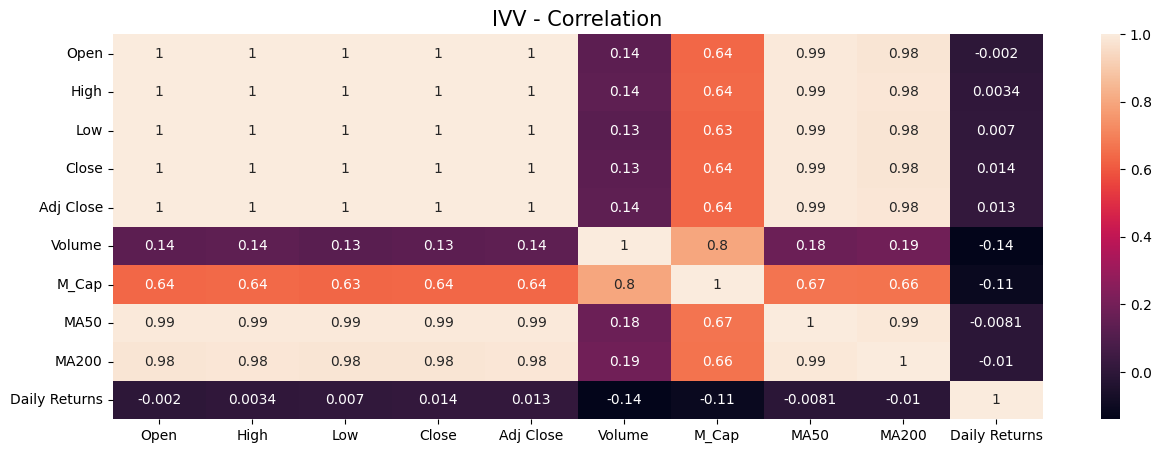

In [31]:
# Correlation table for IVV
ivv_corr = ivv.corr() 

# Heatmap for QQQ
plt.figure(figsize=(15,5))
sns.heatmap(ivv_corr, annot=True)

# Header
plt.title('IVV - Correlation', fontsize=15)
plt.show()

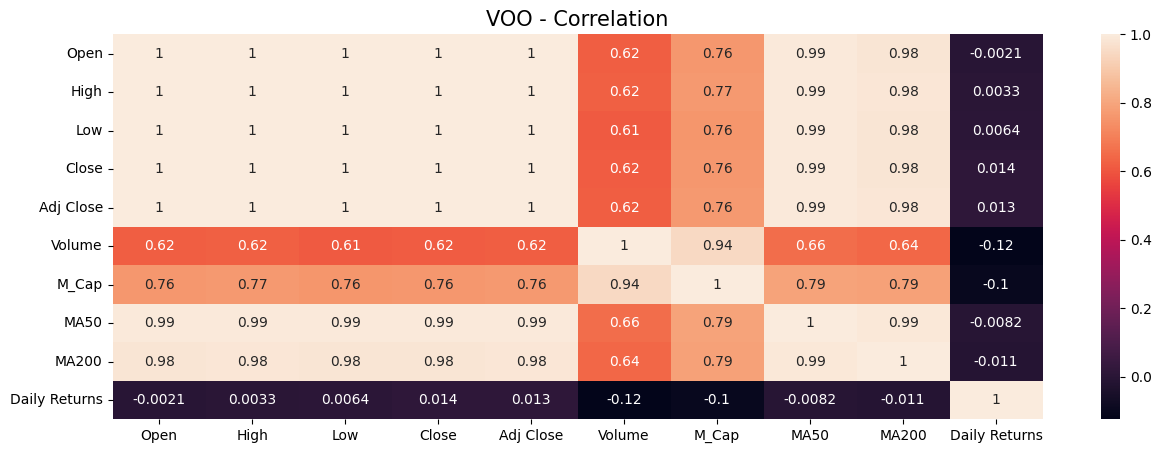

In [32]:
# Correlation table for VOO
voo_corr = voo.corr() 

# Heatmap for VOO
plt.figure(figsize=(15,5))
sns.heatmap(voo_corr, annot=True)

# Header
plt.title('VOO - Correlation', fontsize=15)
plt.show()

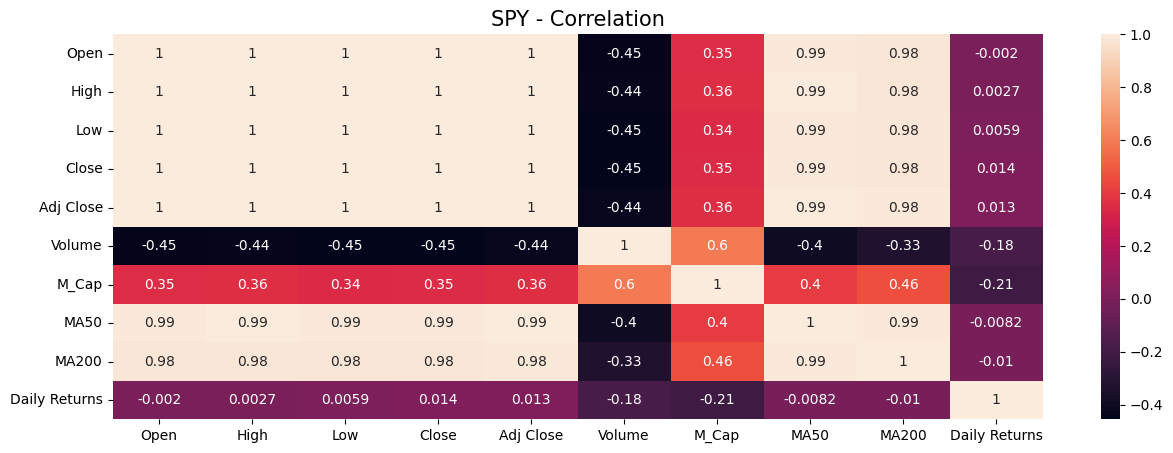

In [33]:
# Correlation table for SPY
spy_corr = spy.corr() 

# Heatmap for VOO
plt.figure(figsize=(15,5))
sns.heatmap(spy_corr, annot=True)

# Header
plt.title('SPY - Correlation', fontsize=15)
plt.show()

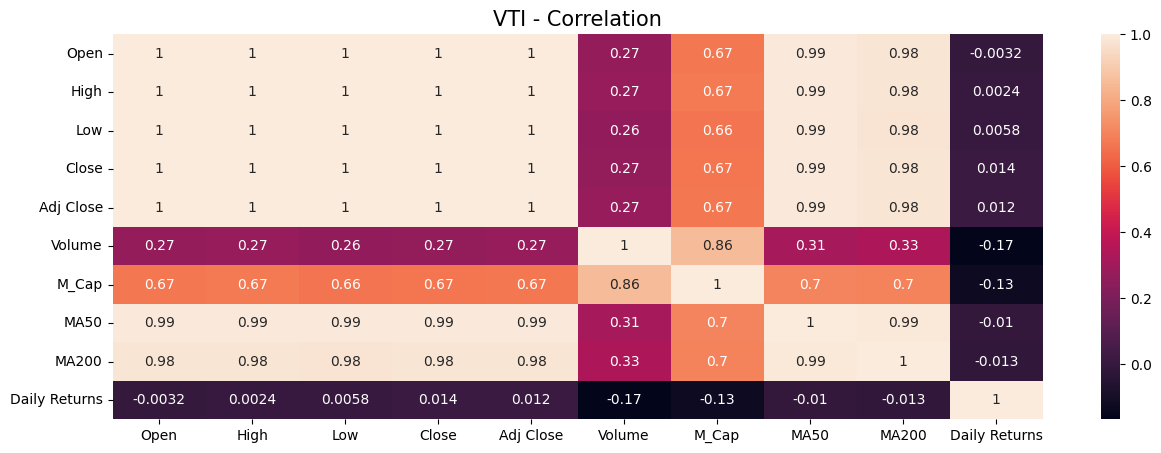

In [34]:
# Correlation table for VTI
vti_corr = vti.corr() 

# Heatmap for VTI
plt.figure(figsize=(15,5))
sns.heatmap(vti_corr, annot=True)

# Header
plt.title('VTI - Correlation', fontsize=15)
plt.show()

### For the given data, the heatmaps shows us that for VOO, IVV & VTI, volume is positively correlated to Open, High, Low, Close, and Adj Close; unlike SPY which is negatively correlated to the previously mentioned variables. What correlation means is that if Volume was to increase, then it is more likely for prices to go up and vice-versa.

# Step 12 - Correlation among Index Funds

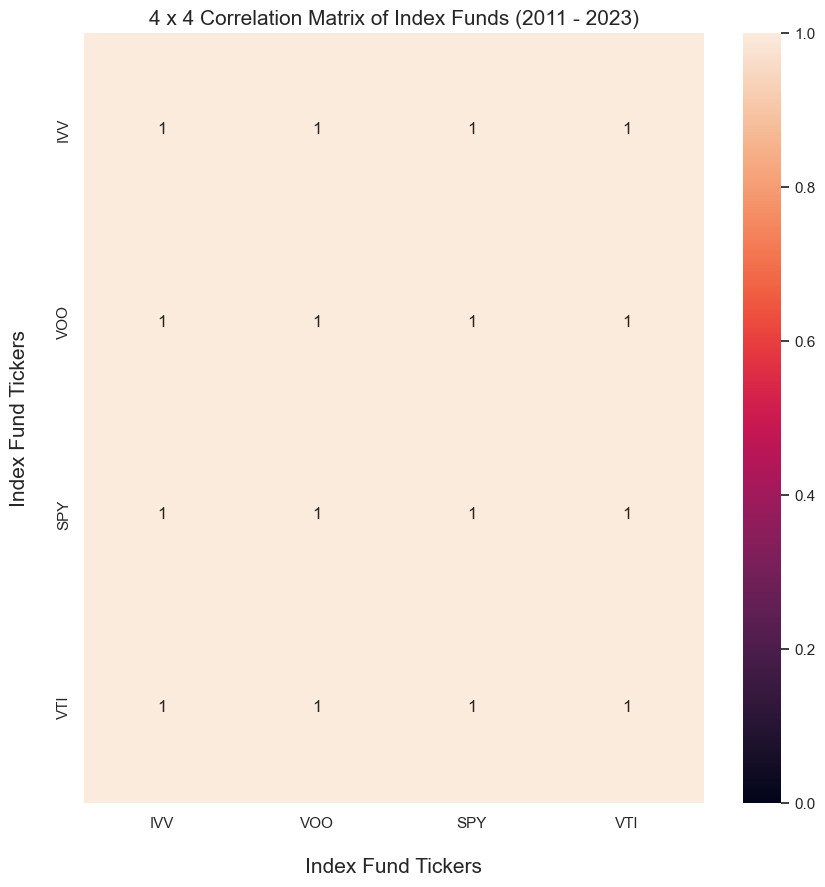

In [35]:
close_prices = pd.DataFrame()
for ticker in tickers:
    close_prices[ticker] = data[ticker]['Close']

corr_matrix = close_prices.corr()

sns.set(style= 'white')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, ax=ax)

# set the axis labels and title
ax.set_xlabel('Index Fund Tickers', labelpad=20, fontsize=15)
ax.set_ylabel('Index Fund Tickers', labelpad=20, fontsize=15)
ax.set_title('4 x 4 Correlation Matrix of Index Funds (2011 - 2023)', fontsize=15);

### The 4-by-4 matrix shows that these index funds are perfectly correlated! The reason being that these funds are NOT diversifying away. Although using a correlation coefficient on its own may not help to predict future stock returns, we know that these funds will move (or trend) in the same direction. Recall that index funds are basically a collection of stocks. Most of these stocks are hold within the 4 funds are the same, therefore behavior will be almost identical - that is why the high/ low/ open price trends are almost identical despite that the funds are weighted differently.

### The correlation of zero (0) is possible when the price movement of (for example) Vanguard Total Stock has no effect on the direction of Vanguard S&P 500 i.e., Vanguard S&P 500 and Vanguard Total go up and down completely randomly.

# Conclusion - What Should I Invest In?

Due that the 4 ETFs have low volatility, favorable trend patterns (upward - increasing value as time passes), & overrall low risk / great return ratio, any of these stocks would be worth buying and holding for many years. The only exception would be SPY. The reason being that it has the highest expense ratio among the 4 ETFs, despite having slightly better returns - on the long term, a high expense ratio is an important variable to keep in mind as as a passive investor looking for long-term growth.

As we noticed VOO & IVV follow an IDENTICAL price (open, high, low) therefore investing in either one won't make any difference and the same applies for long-term returns. Among VOO/IVV (both S&P 500 ETFs) & VTI (Total Stock Market), VTI has slightly more volatility, therefore IVV or VOO are less riskier investment options. Note that IVV, VOO & VTI have low expense-ratios (which is essential for 'buying & holding' strategies).

Note that when it comes to trending directions, since these 4 ETFs are highly correlated, this will move upward or downward depending on the economy (meaning that if there's a downturn - all of these will fall at the same time).

### Based on these facts, the best long-term investment options (in order from greatest to least) within the 'Large Blend' fund category for passive investors are: 
1. IVV or VOO - both are identical (investing in both at the same time is not recommended due to lack of diversification)
2. VTI
3. SPY